# Final CNN Model

## Import Necessary Libraries

In [11]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

print(f"Keras version: {keras.__version__}")
print(f"Using backend: {keras.backend.backend()}")

Keras version: 3.12.0
Using backend: tensorflow


## Import Data

In [2]:
#define data paths
TRAINING_DIR = "split_data/training/"
VALIDATION_DIR = "split_data/validation/"
TEST_DIR = "split_data/test/"

## Create data generators with augmentation

In [3]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
  #create the ImageDataGenerator class for the training set
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
  
  #only apply the rescale transformation to the validation and test sets
  val_test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='sparse',
                                                      target_size=(224, 224))
  validation_generator = val_test_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                              batch_size=32,
                                                              class_mode='sparse',
                                                              target_size=(224, 224))
  test_generator = val_test_datagen.flow_from_directory(directory=TEST_DIR,
                                                        batch_size=32,
                                                        class_mode='sparse',
                                                        target_size=(224, 224))
  return train_generator, validation_generator, test_generator


In [4]:
#test the generators
train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR)

Found 544 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Found 81 images belonging to 3 classes.


## Final Model

In [5]:
def create_model():

  model = keras.models.Sequential([

    keras.layers.Conv2D(32, kernel_size = (3,3), activation="relu", padding="same", input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)), 

    keras.layers.Conv2D(64, kernel_size = (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2, 2)), 

    keras.layers.Conv2D(128, kernel_size = (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2, 2)), 

    keras.layers.Conv2D(128, kernel_size = (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(256, kernel_size = (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2, 2)),

    
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"), 
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation="relu"), 
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")

  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

model = create_model()

/Users/gabriellamessenger/Desktop/STAT_362/stat263-finalproject/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:


#set up early stopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, start_from_epoch=10,
                           restore_best_weights=True)
]

#train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks = callbacks)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 963ms/step - accuracy: 0.4596 - loss: 1.4015 - val_accuracy: 0.2839 - val_loss: 1.1539
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 879ms/step - accuracy: 0.5018 - loss: 1.0654 - val_accuracy: 0.5613 - val_loss: 0.9851
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 837ms/step - accuracy: 0.5423 - loss: 1.0353 - val_accuracy: 0.5613 - val_loss: 0.9743
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5460 - loss: 0.9970 - val_accuracy: 0.5613 - val_loss: 0.9657
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 977ms/step - accuracy: 0.5239 - loss: 1.0294 - val_accuracy: 0.5613 - val_loss: 0.9805
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 832ms/step - accuracy: 0.5515 - loss: 1.0346 - val_accuracy: 0.5613 - val_loss: 0.9658
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 896ms/step - accuracy: 0.5478 - loss: 1.0093 - val_accuracy: 0.5613 - val_loss: 0.9710
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 898ms/step - accuracy: 0.5607 - loss: 0.9946 - val_accurac

## Evaluate model performance

In [7]:
#get test accuracy and loss
preds = model.evaluate(test_generator)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.7778 - loss: 0.5640
Loss = 0.5640156865119934
Test Accuracy = 0.7777777910232544
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.7778 - loss: 0.5640
Loss = 0.5640156865119934
Test Accuracy = 0.7777777910232544


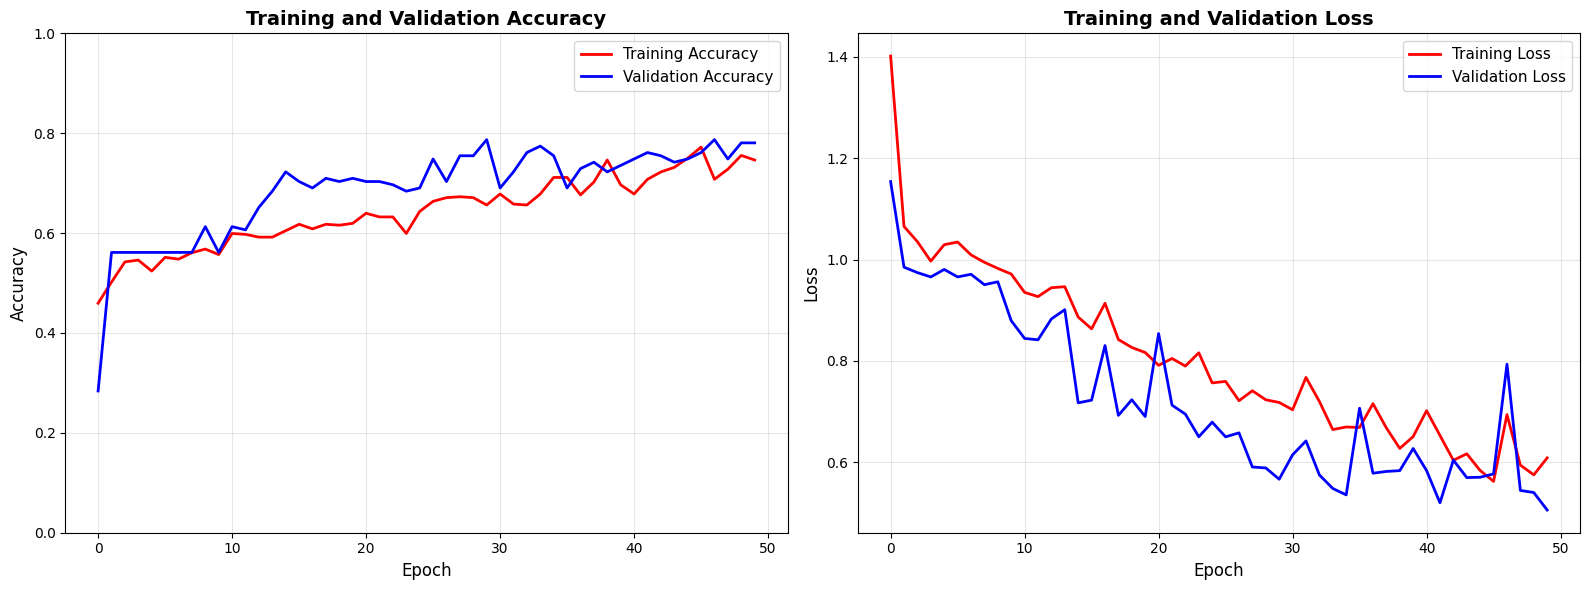


  Training Summary
  Best Training Accuracy:   0.7721 (epoch 46)
  Best Validation Accuracy: 0.7871 (epoch 30)
  Final Training Accuracy:  0.7463
  Final Validation Accuracy:0.7806
  Accuracy Gap (final):     0.0343


In [8]:
#training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#get number of epochs actually executed with early stopping
epochs_range = range(len(acc))

#create plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#plot accuracy
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

#plot loss
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#print summary stats
print(f"\n{'='*60}")
print(f"  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f} (epoch {acc.index(max(acc))+1})")
print(f"  Best Validation Accuracy: {max(val_acc):.4f} (epoch {val_acc.index(max(val_acc))+1})")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final):     {abs(acc[-1] - val_acc[-1]):.4f}")
print(f"{'='*60}")

### Validation eval

In [9]:
#evaluate on validation set
validation_generator.shuffle = False
y_true = validation_generator.classes
y_pred_val_probs = model.predict(validation_generator)
y_pred_val = np.argmax(y_pred_val_probs, axis=1)

print("Validation Classification Report:")
print(classification_report(y_true, y_pred_val, target_names=validation_generator.class_indices.keys()))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step
Validation Classification Report:
              precision    recall  f1-score   support

      benign       0.57      0.62      0.60        87
   malignant       0.32      0.26      0.29        42
      normal       0.15      0.15      0.15        26

    accuracy                           0.45       155
   macro avg       0.35      0.35      0.35       155
weighted avg       0.43      0.45      0.44       155

Validation Classification Report:
              precision    recall  f1-score   support

      benign       0.57      0.62      0.60        87
   malignant       0.32      0.26      0.29        42
      normal       0.15      0.15      0.15        26

    accuracy                           0.45       155
   macro avg       0.35      0.35      0.35       155
weighted avg       0.43      0.45      0.44       155



In [12]:
# compute confusion matrix
cm = confusion_matrix(y_true, y_pred_val)

classes = list(validation_generator.class_indices.keys())
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

print("Validation confusion Matrix:")
print(cm_df)

Validation confusion Matrix:
           benign  malignant  normal
benign         54         16      17
malignant      25         11       6
normal         15          7       4


### Train eval

In [13]:
#evaluate on train set
train_generator.shuffle = False
y_true = train_generator.classes
y_pred_train_probs = model.predict(train_generator)
y_pred_train = np.argmax(y_pred_train_probs, axis=1)

print("Train Classification Report:")
print(classification_report(y_true, y_pred_train, target_names=train_generator.class_indices.keys()))

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step
Train Classification Report:
              precision    recall  f1-score   support

      benign       0.55      0.60      0.58       305
   malignant       0.24      0.21      0.22       147
      normal       0.14      0.12      0.13        92

    accuracy                           0.42       544
   macro avg       0.31      0.31      0.31       544
weighted avg       0.40      0.42      0.41       544

Train Classification Report:
              precision    recall  f1-score   support

      benign       0.55      0.60      0.58       305
   malignant       0.24      0.21      0.22       147
      normal       0.14      0.12      0.13        92

    accuracy                           0.42       544
   macro avg       0.31      0.31      0.31       544
weighted avg       0.40      0.42      0.41       544



In [14]:
# compute confusion matrix
cm = confusion_matrix(y_true, y_pred_train)

classes = list(validation_generator.class_indices.keys())
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

print("Train confusion Matrix:")
print(cm_df)


Train confusion Matrix:
           benign  malignant  normal
benign        184         77      44
malignant      90         31      26
normal         59         22      11


### Test eval

In [15]:
#evaluate on test set
test_generator.shuffle = False
y_true = test_generator.classes
y_pred_test_probs = model.predict(test_generator)
y_pred_test = np.argmax(y_pred_test_probs, axis=1)

print("Test Classification Report:")
print(classification_report(y_true, y_pred_test, target_names=test_generator.class_indices.keys()))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
Test Classification Report:
              precision    recall  f1-score   support

      benign       0.59      0.60      0.59        45
   malignant       0.37      0.33      0.35        21
      normal       0.25      0.27      0.26        15

    accuracy                           0.47        81
   macro avg       0.40      0.40      0.40        81
weighted avg       0.47      0.47      0.47        81

Test Classification Report:
              precision    recall  f1-score   support

      benign       0.59      0.60      0.59        45
   malignant       0.37      0.33      0.35        21
      normal       0.25      0.27      0.26        15

    accuracy                           0.47        81
   macro avg       0.40      0.40      0.40        81
weighted avg       0.47      0.47      0.47        81



In [16]:
# compute confusion matrix
cm = confusion_matrix(y_true, y_pred_test)

classes = list(validation_generator.class_indices.keys())
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

print("Test confusion Matrix:")
print(cm_df)

Test confusion Matrix:
           benign  malignant  normal
benign         27          9       9
malignant      11          7       3
normal          8          3       4


### Display sample predictions

In [17]:

# get file paths for test images
from pathlib import Path

# collect all test image paths organized by  true class
test_image_paths = {}
test_dir = Path(TEST_DIR)

for class_dir in test_dir.iterdir():
    if class_dir.is_dir():
        class_name = class_dir.name
        test_image_paths[class_name] = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.png'))

print(f"Found classes in test set: {list(test_image_paths.keys())}")


Found classes in test set: ['malignant', 'benign', 'normal']


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


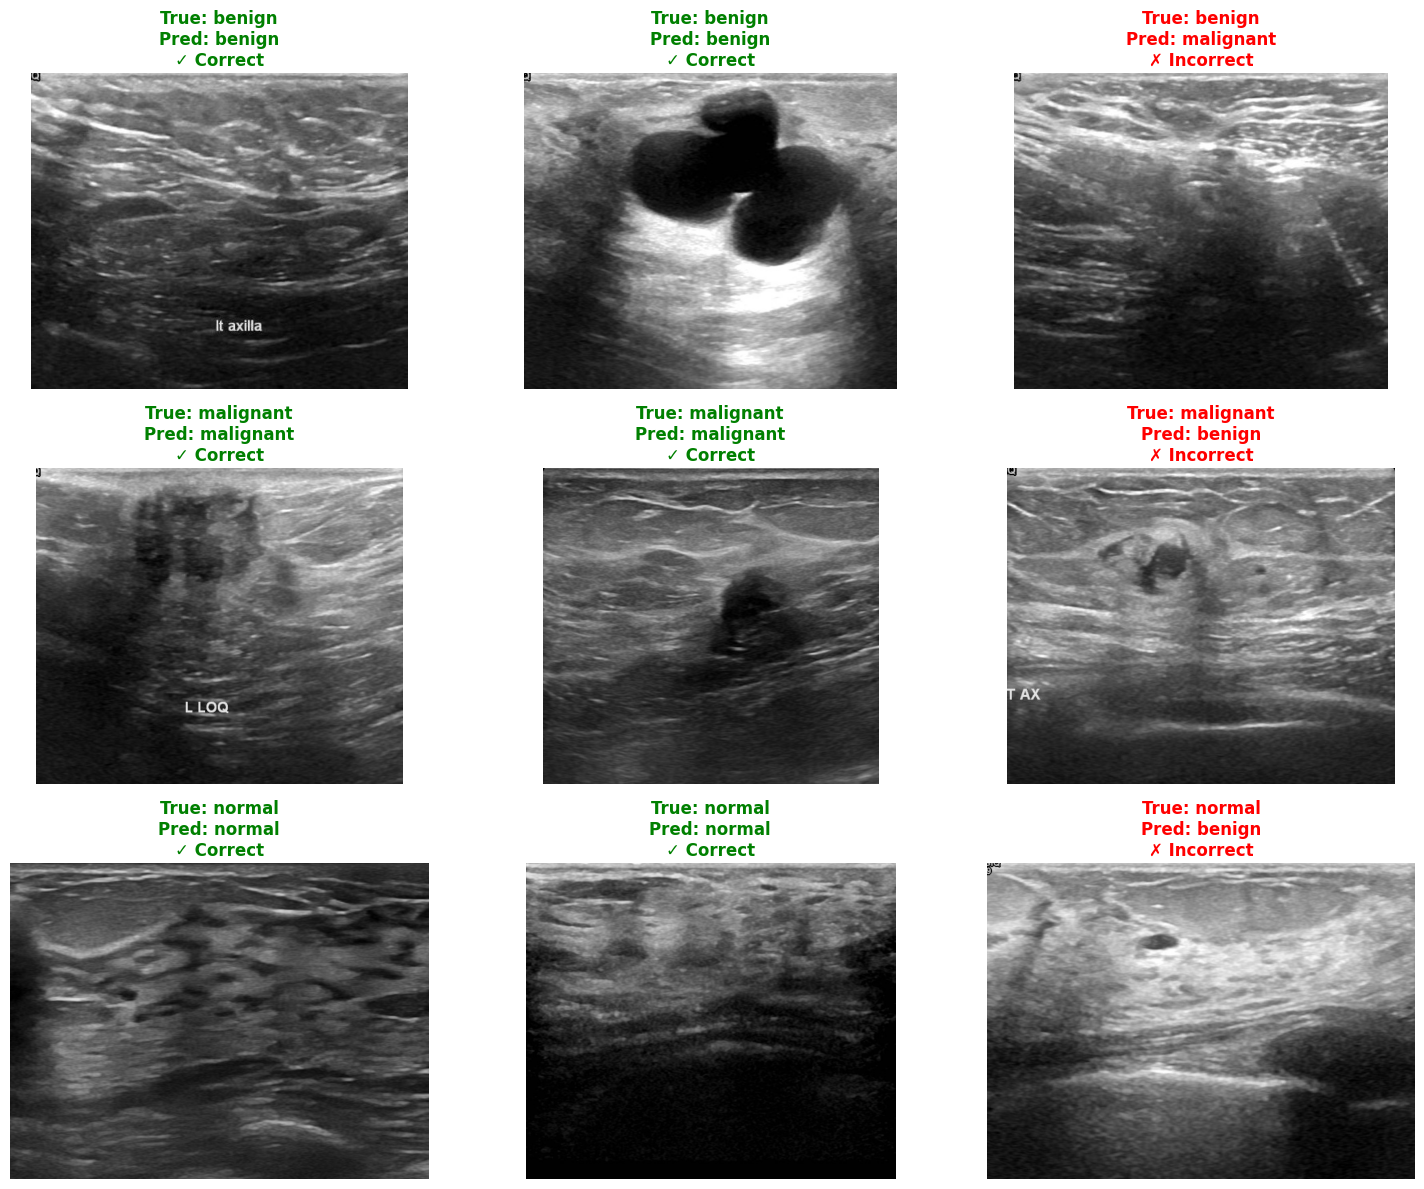

In [18]:

# display sample predictions with true and predicted classes
from PIL import Image

class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


test_images = []
test_labels_true = []
test_predictions = []

for class_name, image_paths in test_image_paths.items():
    for img_path in image_paths:
        test_images.append(img_path)
        test_labels_true.append(class_indices.get(class_name, 0))

# get prediction
test_images_array = []
for img_path in test_images:
    img = Image.open(img_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    test_images_array.append(img_array)

test_images_array = np.array(test_images_array)
predictions = model.predict(test_images_array)
predicted_classes = np.argmax(predictions, axis=1)

# organize predictions by true class with correct/incorrect split
predictions_by_true_class = {class_name: {'correct': [], 'incorrect': []} for class_name in class_names.values()}

for img_path, true_class_idx, pred_class_idx in zip(test_images, test_labels_true, predicted_classes):
    true_class_name = class_names[true_class_idx]
    pred_class_name = class_names[pred_class_idx]
    
    result = {
        'img_path': img_path,
        'true_class': true_class_name,
        'pred_class': pred_class_name
    }
    
    if true_class_idx == pred_class_idx:
        predictions_by_true_class[true_class_name]['correct'].append(result)
    else:
        predictions_by_true_class[true_class_name]['incorrect'].append(result)

# display 2 correctly predicted and 1 incorrectly predicted for each category
num_classes = len(class_names)
fig, axes = plt.subplots(num_classes, 3, figsize=(15, 4 * num_classes))
if num_classes == 1:
    axes = axes.reshape(1, -1)

for row, true_class in enumerate(sorted(predictions_by_true_class.keys())):
    correct_preds = predictions_by_true_class[true_class]['correct']
    incorrect_preds = predictions_by_true_class[true_class]['incorrect']
    
    # correctly predicted
    for col in range(2):
        if col < len(correct_preds):
            img_data = correct_preds[col]
            img = Image.open(img_data['img_path']).convert('RGB')
            axes[row, col].imshow(img)
            title = f"True: {img_data['true_class']}\nPred: {img_data['pred_class']}\n✓ Correct"
            axes[row, col].set_title(title, fontweight='bold', color='green')
        else:
            axes[row, col].text(0.5, 0.5, f"No correct predictions", 
                              ha='center', va='center', fontsize=12)
        axes[row, col].axis('off')
    
    # incorrectly predicted
    if len(incorrect_preds) > 0:
        img_data = incorrect_preds[0]
        img = Image.open(img_data['img_path']).convert('RGB')
        axes[row, 2].imshow(img)
        title = f"True: {img_data['true_class']}\nPred: {img_data['pred_class']}\n✗ Incorrect"
        axes[row, 2].set_title(title, fontweight='bold', color='red')
    else:
        axes[row, 2].text(0.5, 0.5, f"No incorrect predictions", 
                          ha='center', va='center', fontsize=12)
    axes[row, 2].axis('off')

plt.tight_layout()
plt.show()


## Save predictions

In [22]:

# save predictions and copy images to organized folder structure
import shutil

# main predictions folder
PREDICTIONS_DIR = "model_predictions"
Path(PREDICTIONS_DIR).mkdir(exist_ok=True)

# subdirectories for test predictions and copy images
test_dataset_dir = Path(PREDICTIONS_DIR) / "test"
test_dataset_dir.mkdir(exist_ok=True)

for pred_class_name in class_names.values():
    (test_dataset_dir / pred_class_name).mkdir(exist_ok=True)

# copy test images organized by predicted class
for img_path, true_class_idx, pred_class_idx in zip(test_images, test_labels_true, predicted_classes):
    pred_class_name = class_names[pred_class_idx]
    true_class_name = class_names[true_class_idx]
    
    pred_class_dir = test_dataset_dir / pred_class_name
    filename = f"{Path(img_path).stem}.jpg"
    shutil.copy(img_path, pred_class_dir / filename)

print(f"Saved test predictions to {test_dataset_dir}")

# save train and validation predictions
for dataset_name, predictions, source_dir in [
    ('train', y_pred_train, TRAINING_DIR),
    ('validation', y_pred_val, VALIDATION_DIR)
]:
    dataset_dir = Path(PREDICTIONS_DIR) / dataset_name
    dataset_dir.mkdir(exist_ok=True)
    
    # Create subdirectories for each predicted class
    for pred_class_name in class_names.values():
        (dataset_dir / pred_class_name).mkdir(exist_ok=True)
    
    # Collect and organize images
    source_path = Path(source_dir)
    img_paths = []
    true_labels = []
    for class_dir in sorted(source_path.iterdir()):
        if class_dir.is_dir():
            class_name = class_dir.name
            for img_file in sorted(class_dir.glob('*.jpg')) + sorted(class_dir.glob('*.png')):
                img_paths.append(img_file)
                true_labels.append(class_indices.get(class_name, 0))
    
    # Copy images organized by predicted class
    for img_path, true_class_idx, pred_class_idx in zip(img_paths, true_labels, predictions):
        pred_class_name = class_names[pred_class_idx]
        true_class_name = class_names[true_class_idx]
        
        pred_class_dir = dataset_dir / pred_class_name
        filename = f"{Path(img_path).stem}.jpg"
        shutil.copy(img_path, pred_class_dir / filename)
    
    print(f"Saved {dataset_name} predictions to {dataset_dir}")

# Save prediction arrays as numpy files for easy loading
np.save(f'{PREDICTIONS_DIR}/train_predictions.npy', y_pred_train)
np.save(f'{PREDICTIONS_DIR}/val_predictions.npy', y_pred_val)
np.save(f'{PREDICTIONS_DIR}/test_predictions.npy', y_pred_test)

print(f"\n Saved prediction arrays to {PREDICTIONS_DIR}/")

##  To load predictions later:
#       y_pred_train = np.load('model_predictions/train_predictions.npy')
#       y_pred_val = np.load('model_predictions/val_predictions.npy')
#       y_pred_test = np.load('model_predictions/test_predictions.npy')


Saved test predictions to model_predictions/test
Saved train predictions to model_predictions/train
Saved validation predictions to model_predictions/validation

 Saved prediction arrays to model_predictions/
